In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1)
X,y = mnist["data"],mnist["target"]
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [7]:
# change target label from string to integer
y = y.astype(np.uint8)

In [8]:
# split into train and test, mnist is already split into train and test
X_train, X_test, y_train, y_test = X.iloc[:60000,:], X.iloc[60000:,:], y[:60000],y[60000:]
some_digit = X.iloc[0]

In [4]:
# use KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

In [11]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_train)

KNeighborsClassifier()

In [14]:
# check acciracy using cross validation on training set
from sklearn.model_selection import cross_val_score

In [15]:
cross_val_score(knn_clf,X_train,y_train, cv=3,scoring="accuracy")

array([0.9676 , 0.9671 , 0.96755])

In [16]:
# look at the training prediction from cross validation on confusion matrix
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(knn_clf, X_train, y_train, cv = 3)

In [20]:
from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5882,    4,    5,    0,    1,    5,   19,    1,    2,    4],
       [   2, 6705,   10,    2,    1,    1,    3,   11,    2,    5],
       [  51,   60, 5695,   15,   11,    4,    9,   87,   17,    9],
       [   8,   16,   39, 5903,    1,   63,    4,   40,   33,   24],
       [   3,   53,    1,    1, 5628,    0,   13,   11,    2,  130],
       [  14,   18,    4,   67,    6, 5211,   58,    7,   11,   25],
       [  24,   13,    1,    0,    5,   27, 5846,    0,    2,    0],
       [   4,   68,   14,    3,   20,    1,    0, 6083,    3,   69],
       [  25,   85,   15,   87,   35,  111,   26,   19, 5382,   66],
       [  19,   13,    5,   45,   46,   12,    5,   79,   15, 5710]],
      dtype=int64)

TP values are on the diagonal  
Larger values have lighter colours.   
Since everythoing around the diagonal is black, it shows that there are very few wrong classifications

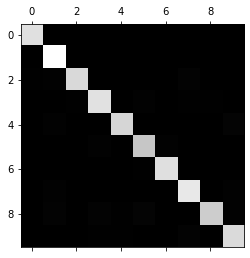

In [21]:
plt.matshow(conf_mx, cmap = plt.cm.gray)

In [28]:
y_pred_test = knn_clf.predict(X_test)

In [34]:
## confusion matrix for the test data
confusion_matrix(y_test, y_pred_test)

array([[ 974,    1,    1,    0,    0,    1,    2,    1,    0,    0],
       [   0, 1133,    2,    0,    0,    0,    0,    0,    0,    0],
       [  11,    8,  991,    2,    1,    0,    1,   15,    3,    0],
       [   0,    3,    3,  976,    1,   13,    1,    6,    3,    4],
       [   3,    7,    0,    0,  944,    0,    4,    2,    1,   21],
       [   5,    0,    0,   12,    2,  862,    4,    1,    2,    4],
       [   5,    3,    0,    0,    3,    2,  945,    0,    0,    0],
       [   0,   22,    4,    0,    3,    0,    0,  988,    0,   11],
       [   8,    3,    5,   13,    6,   12,    5,    5,  913,    4],
       [   5,    7,    3,    9,    7,    3,    1,   10,    2,  962]],
      dtype=int64)

In [31]:
# overall score for the test data
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_test)

0.9688

In [40]:
# get the list of parameters for a algorithm
KNeighborsClassifier().get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [41]:
# using GridSearch to achive score over 97%
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_neighbors':[5,10,30], 'weights':['uniform','distance']}
]
knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv = 3, scoring = 'accuracy', return_train_score = True)


In [42]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [5, 10, 30],
                          'weights': ['uniform', 'distance']}],
             return_train_score=True, scoring='accuracy')

In [43]:
grid_search.best_params_

{'n_neighbors': 5, 'weights': 'distance'}

In [44]:
grid_search.best_estimator_

KNeighborsClassifier(weights='distance')

In [46]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres["params"]):
    print(np.sqrt(-mean_score),params)

nan {'n_neighbors': 5, 'weights': 'uniform'}
nan {'n_neighbors': 5, 'weights': 'distance'}
nan {'n_neighbors': 10, 'weights': 'uniform'}
nan {'n_neighbors': 10, 'weights': 'distance'}
nan {'n_neighbors': 30, 'weights': 'uniform'}
nan {'n_neighbors': 30, 'weights': 'distance'}


C:\Users\me800435\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


In [47]:
cvres

{'mean_fit_time': array([1.41539168, 0.60445229, 0.49334415, 0.39336729, 0.37468473,
        0.5668753 ]),
 'std_fit_time': array([0.59108024, 0.12562495, 0.08505769, 0.06120043, 0.05176495,
        0.17672348]),
 'mean_score_time': array([60.27029069, 43.76681042, 46.83982038, 42.74108672, 42.03152402,
        49.20930171]),
 'std_score_time': array([12.63959878,  1.05912695,  3.50073916,  2.03409822,  1.44767284,
         7.05715946]),
 'param_n_neighbors': masked_array(data=[5, 5, 10, 10, 30, 30],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_weights': masked_array(data=['uniform', 'distance', 'uniform', 'distance',
                    'uniform', 'distance'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 5, 'weights': 'uniform'},
  {'n_neighbors': 5, 'weights': 'distance'},
  {'n_neighbors': 10, 'weights': 'unif

In [51]:
knn_clf = KNeighborsClassifier(weights='distance')
knn_clf.fit(X_train,y_train)

KNeighborsClassifier(weights='distance')

In [52]:
y_pred_test = knn_clf.predict(X_test)

In [53]:
accuracy_score(y_test, y_pred_test)

0.9691